# Sidekick - Mixture of Gaussessus Prociens
We train a GP on the successful projects and one on the failed projects.

In [1]:
%matplotlib inline
import os
import sys
sys.path.insert(0, os.path.abspath('../utils/')) # Add sibling to Python path
sys.path.insert(0, os.path.abspath('../src/')) # Add sibling to Python path
sys.stdout.flush() # Print output on the fly in Notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 16
from IPython.display import display
import numpy as np
import GPy
import cPickle as cp
import matplotlib.pyplot as plt
from math import floor
from dataset import Sidekick
from misc_utils import progress

DATA_DIR = "../data/sidekick"

warning in stationary: failed to import cython module: falling back to numpy


## Load data and separate successful from failed projects

In [2]:
sk = Sidekick()
sk.load()
projects_train, projects_test = sk.split()
successful = [project.money for project in projects_train if project.successful]
failed = [project.money for project in projects_train if not project.successful]

Loading projects...
Loading statuses...
Converting to project instances...
Data loaded.


## Train GP-LIN on successful projects

In [4]:
X_train_s = np.ndarray(shape=(len(successful[0]), 1), buffer=np.arange(len(successful[0])), dtype=int) 
Y_train_s = np.array(successful).T
print X_train_s.shape
print Y_train_s.shape

kernel = GPy.kern.Linear(input_dim=1)
m_s = GPy.models.GPRegression(X_train_s, Y_train_s, kernel)
m_s.optimize()
display(m_s)

(1000, 1)
(1000, 6192)


GP_regression.,Value,Constraint,Prior,Tied to
linear.variances,0.000364552591393,+ve,,
Gaussian_noise.variance,7.72270489279,+ve,,


## Train GP-LIN on failed projects

In [5]:
X_train_f = np.ndarray(shape=(len(failed[0]), 1), buffer=np.arange(len(failed[0])), dtype=int) 
Y_train_f = np.array(failed).T
print X_train_f.shape
print Y_train_f.shape

kernel = GPy.kern.Linear(input_dim=1)
m_f = GPy.models.GPRegression(X_train_f, Y_train_f, kernel)
m_f.optimize()
display(m_f)

(1000, 1)
(1000, 6641)


GP_regression.,Value,Constraint,Prior,Tied to
linear.variances,0.570041922966,+ve,,
Gaussian_noise.variance,1.30187634475e-09,+ve,,


## Set up experiment

In [6]:
def classify_project(project, m_s, m_f, threshold=0.8):
    money = project.money[:int(np.floor(len(project.money)*threshold))]
    X_test = np.ndarray(shape=(len(money), 1), buffer=np.arange(len(money)), dtype=int) 
    Y_test = np.ndarray(shape=(len(money), 1), buffer=money, dtype=int)
    m_s_test.set_XY(X=X_test, Y=Y_test)
    m_f_test.set_XY(X=X_test, Y=Y_test)
    log_likelihood_successful = m_s_test.log_likelihood()
    log_likelihood_failed = m_f_test.log_likelihood()

    return int(log_likelihood_successful > log_likelihood_failed)

In [ ]:
project_test = projects_test[0]
print len(projects_test)
print project_test
state = classify_project(project_test, m_s_test, m_f_test)
print "Predicted %s" % "successful" if state else "failed"

print m_s_test.log_likelihood()
print m_f_test.log_likelihood()

## Run experiment

In [8]:
m_s_test = m_s.copy()
m_f_test = m_f.copy()
accuracy = []
predicted = []
actual = []
projects_test_small = projects_test[:100]
np.random.shuffle(projects_test_small)
for project in projects_test_small:
    state = classify_project(project, m_s_test, m_f_test, threshold=1.0)
    predicted.append(state)
    actual.append(int(project.successful))
    accuracy.append(int(state == project.successful))
print "Accuracy %s" % np.mean(accuracy)
print predicted
print actual
print accuracy

Accuracy 0.52
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


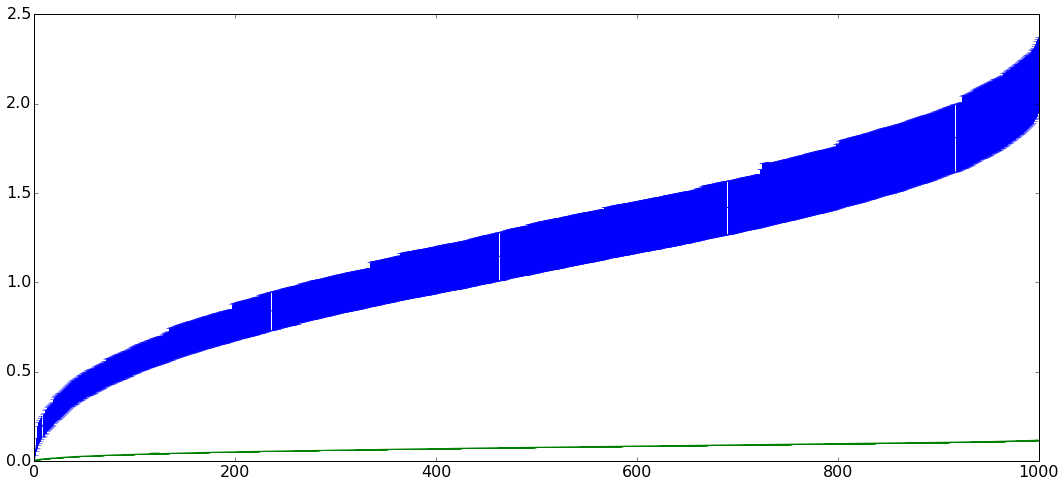

In [9]:
s = np.array(successful)
mean_s = np.mean(s, axis=0)
std_s = np.std(s, axis=0)
f = np.array(failed)
mean_f = np.mean(f, axis=0)
std_f = np.std(f, axis=0)
plt.errorbar(range(1000), mean_s, std_s / np.sqrt(6192.0))
plt.errorbar(range(1000), mean_f, std_f / np.sqrt(6641.0))
plt.show()